In [7]:
import os
import psycopg2
from dotenv import load_dotenv
import mysql.connector
import boto3
import json
from datetime import datetime
import cv2
import matplotlib.pyplot as plt
import numpy as np



In [1]:

def import_from_S3(S3directory, filename, outputDirectory):

    # load environment variables from .env file
    load_dotenv()

    # access specific s3 bucket
    bucket_name = os.getenv('AWS_BUCKET')

    # create an S3 client
    s3 = boto3.client('s3')

    # list all of the buckets in your account
    response = s3.list_buckets()
    print(response)


    print(S3directory + filename)

    s3.download_file(bucket_name, S3directory + filename, outputDirectory + filename)


In [3]:

load_dotenv()
host=os.getenv('DB_HOST')

conn = mysql.connector.connect(
    host=os.getenv('DB_HOST'),
    user=os.getenv('DB_USERNAME'),
    password= os.getenv('DB_PASSWORD'),
    database=os.getenv('DB_DATABASE'),
    port=os.getenv('DB_PORT')
)

cursor = conn.cursor()

query = "select url from logograb_videos where id = 5"

cursor.execute(query)

result = cursor.fetchall()
video_url = result[0][0]
filename = video_url.replace('http://spect8-static.s3.amazonaws.com/', '')
print(filename)

#import_from_S3('', filename, '.\\visua\\videos\\')



7801171_2021_05_09_MOL_KBK_1st_Half_445d25.mp4


In [4]:
#import_from_S3('video-analysis/', '1.json', '.\\visua\\analyses\\')


In [3]:
def getFrame(seconds, fps, video_url):
    cap = cv2.VideoCapture(video_url)
    cap.set(cv2.CAP_PROP_POS_FRAMES, seconds * fps)
    ret, frame = cap.read()
    return frame

In [11]:
def plot(frame, rect = None):
    #x, y, w, h = 150, 50, 200, 200
    if rect is not None:
        rect = np.array(rect, dtype=np.int32)
        color = (0, 0, 255)
        thickness = 2
        #frame = cv2.rectangle(frame, (x, y), (x+w, y+h), color, thickness)
        cv2.polylines(frame, [rect], True, (0, 0, 255), 2)
    
    # Convert the frame to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Plot the frame using matplotlib
    plt.imshow(frame)
    plt.axis("off")
    plt.show()

In [4]:
# Open the video file
video = cv2.VideoCapture("visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4")


# Check if frame was read successfully
# if ret:
    # Convert the frame to RGB
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # # Plot the frame using matplotlib
    # plt.imshow(frame)
    # plt.axis("off")
    # plt.show()
    # plot(frame, rect)



In [5]:
def video_to_frames(video, framecount = 100):

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Set the starting frame number
    frame_number = 0

    # Loop through each frame in the video
    while video.isOpened():
        # Read the next frame
        ret, frame = video.read()

        # Check if frame was read successfully
        if ret:
            # Save the frame as a JPEG image
            filename = f"frame_{frame_number:06d}.jpg"
            cv2.imwrite('./foocus_dataset/foocus_dataset_images/' + filename, frame)

            # Increment the frame number
            frame_number += 1
        else:
            break

# Release the video
video.release()

In [9]:
count = 0

In [6]:
with open ('.\\visua\\analyses\\1.json') as f:
    analysis = json.load(f)
    data = analysis.get('data')
    detections = data.get('detections')
    good_detections = []
    count = 0

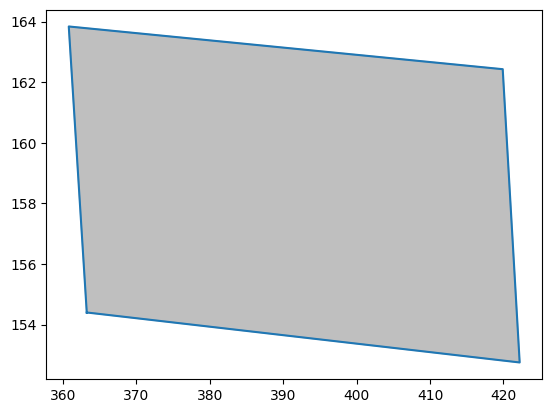

In [11]:
coords = [363.24, 154.4, 422.21, 152.75, 419.9, 162.43, 360.79, 163.84]
x = [coords[i] for i in range(0, len(coords), 2)]
y = [coords[i] for i in range(1, len(coords), 2)]

fig, ax = plt.subplots()
ax.fill(x, y, color='gray', alpha=0.5)
ax.plot(x + [x[0]], y + [y[0]])
plt.show()

In [41]:
good_detections = []
for detection in detections:
    size = detection.get('size')
    confidence = detection.get('confidence')
    if confidence > 0.8 and not size == 'tiny':
        good_detections.append(detection)
i = 0
       

name: DNB
size: medium
confidence: 1
start_time_string: 0:10:44.440
start_time: 1900-01-01 00:10:44.440000
start_time_seconds: 644
duration: 4


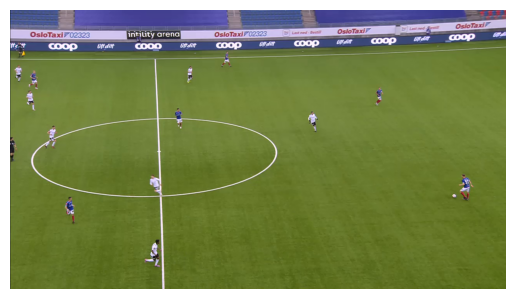

[[542.51, 562.29, 766.47, 500.08, 779.97, 706.54, 575.41, 767.45], [534.97, 555.81, 755.6, 495.5, 768.05, 698.7, 566.52, 757.81], [535.66, 555.38, 756.61, 495.23, 768.86, 698.68, 567.03, 757.65], [537.18, 554.65, 758.13, 495.25, 769.73, 698.57, 567.89, 756.85], [538.92, 554.55, 760.04, 495.54, 771.27, 698.94, 569.26, 756.86], [540.41, 554.47, 761.87, 495.97, 772.58, 699.57, 570.26, 757.02], [542.14, 554.75, 763.86, 496.8, 774.05, 700.52, 571.48, 757.48], [543.82, 555.08, 765.85, 497.74, 775.46, 701.62, 572.59, 758.03], [545.62, 555.54, 767.9, 498.81, 776.93, 702.81, 573.82, 758.65], [547.48, 556.1, 769.96, 499.86, 778.53, 703.94, 575.23, 759.34], [549.36, 556.58, 772.22, 500.79, 780.33, 705.12, 576.68, 760.11], [550.71, 549.27, 774.91, 505.01, 781.79, 706.12, 575.72, 761.73], [552.44, 549.18, 777.69, 505.48, 783.93, 707.42, 576.85, 762.57], [545.86, 548.95, 778.02, 503.1, 786.04, 710.65, 571.65, 765.54], [547.34, 548.54, 780.95, 503.05, 788.46, 711.8, 572.7, 766.43], [548.98, 548.2, 78

In [44]:
detection = good_detections[1]

duration = detection.get('duration')
count += 1
start_time_string = detection.get('timeBegin')
start_time = datetime.strptime(start_time_string, '%H:%M:%S.%f')
start_time_seconds = int((start_time - datetime(1900, 1, 1)).total_seconds())

end_time_string = detection.get('timeEnd')
end_time = datetime.strptime(end_time_string, '%H:%M:%S.%f')
end_time_seconds = int((end_time - datetime(1900, 1, 1)).total_seconds())


duration = end_time_seconds - start_time_seconds
#if not size == 'tiny' and confidence > 0.5:

name = detection.get('name')
print('name: ' + name)

size = detection.get('size')
print('size: ' + size)

confidence = detection.get('confidence')
print('confidence: ' + str(confidence))

start_time_string = detection.get('timeBegin')
print('start_time_string: ' + start_time_string)
start_time = datetime.strptime(start_time_string, '%H:%M:%S.%f')
print('start_time: ' + str(start_time))
start_time_seconds = int((start_time - datetime(1900, 1, 1)).total_seconds())
print('start_time_seconds: ' + str(start_time_seconds))

end_time_string = detection.get('timeEnd')
end_time = datetime.strptime(end_time_string, '%H:%M:%S.%f')
end_time_seconds = int((end_time - datetime(1900, 1, 1)).total_seconds())

media_info = data.get('mediaInfo')
frames = media_info.get('frames')
fps = media_info.get('fps')

duration = end_time_seconds - start_time_seconds
print('duration: ' + str(duration))

average_time = (start_time_seconds + end_time_seconds)/2
frame = getFrame(1000, fps, "visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4")
plot(frame)
coordinates = detection.get('coordinates')
print(coordinates)
for coords in coordinates:
    x = [coords[i] for i in range(0, len(coords), 2)]
    y = [coords[i] for i in range(1, len(coords), 2)]
    points = np.array([[x[0], y[0]], [x[1], y[1]], [x[2], y[2]], [x[3], y[3]]], np.int32)
    print(points)
    rect = points
    color = (0, 0, 255)
    thickness = 2
    #frame = cv2.rectangle(frame, (x, y), (x+w, y+h), color, thickness)
    cv2.polylines(frame, [rect], True, (0, 0, 255), 2)


    #plot(frame)   
    print('start_time_seconds: ' + str(start_time_seconds))
    print('end_time_seconds: ' + str(end_time_seconds))

    #print(coordinates[0])
    #print(len(good_detections))

i+=1


In [24]:
i = 20
id = 10000000000

In [57]:
def saveFrames(url, numberOfImages, startID):
    i = 0
    id = startID

    video = cv2.VideoCapture(url)
    number_of_fames = video.get(cv2.CAP_PROP_FRAME_COUNT)
    # Get the total number of frames in the video
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)

    # Get the frames per second (fps) of the video
    fps = video.get(cv2.CAP_PROP_FPS)

    # Calculate the length of the video in seconds
    video_length = frame_count / fps

    skip = int(video_length/numberOfImages)
    print(skip)
    for i in range(numberOfImages):
        frame = getFrame(i*skip, 25, "visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4")
        print(i*skip)
        # plot(frame)
        cv2.imwrite('./foocus_dataset/foocus_dataset_images/' + str(id) + '.jpg', frame)
        print(i)

        id += 1

In [55]:
3900
frame = getFrame(5000, 25, "visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4")
video_url= "visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4"
cap = cv2.VideoCapture(video_url)
cap.set(cv2.CAP_PROP_POS_FRAMES, seconds * fps)

# print(frame.shape)
# plt.imshow(frame)
# plot(frame)

In [58]:
saveFrames("visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4", 100, 10000000000)

39
0
0
39
1
78
2
117
3
156
4
195
5
234
6
273
7
312
8
351
9
390
10
429
11
468
12
507
13
546
14
585
15
624
16
663
17
702
18
741
19
780
20
819
21
858
22
897
23
936
24
975
25
1014
26
1053
27
1092
28
1131
29
1170
30
1209
31
1248
32
1287
33
1326
34
1365
35
1404
36
1443
37
1482
38
1521
39
1560
40
1599
41
1638
42
1677
43
1716
44
1755
45
1794
46
1833
47
1872
48
1911
49
1950
50
1989
51
2028
52
2067
53
2106
54
2145
55
2184
56
2223
57
2262
58
2301
59
2340
60
2379
61
2418
62
2457
63
2496
64
2535
65
2574
66
2613
67
2652
68
2691
69
2730
70
2769
71
2808
72
2847
73
2886
74
2925
75
2964
76
3003
77
3042
78
3081
79
3120
80
3159
81
3198
82
3237
83
3276
84
3315
85
3354
86
3393
87
3432
88
3471
89
3510
90
3549
91
3588
92
3627
93
3666
94
3705
95
3744
96
3783
97
3822
98
3861
99


In [ ]:
pts = np.array([[537,554],[758,495],[769,698],[567,756]], np.int32)
pts = pts.reshape((-1, 1, 2))

cv2.polylines(frame, [pts], True, (0, 0, 255), 2)

In [9]:
def two_tofour_coordinates(x1, y1, x2, y2):
    points = np.array([[x1, y2], [x1, y1], [x2, y1], [x2, y2]], np.int32)
    return points

[[ 38 142]
 [ 38  12]
 [234  12]
 [234 142]]


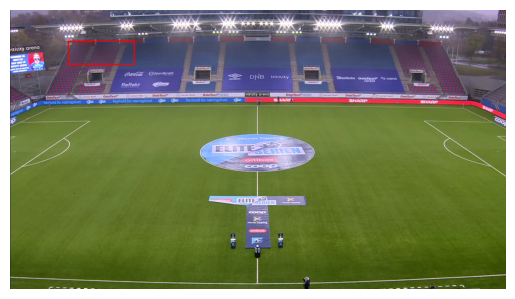

In [16]:
frame = getFrame(i, 25, "visua/videos/7801176_2021_05_09_VIF_RBK_1st_Half_3cdbc3.mp4")

pts = np.array([[38,142],[38,12],[234,12],[234,142]], np.int32)
#pts = np.array([[537,554],[758,495],[769,698],[567,756]], np.int32)
print(two_tofour_coordinates(38, 12, 234, 142))
pts = pts.reshape((-1, 1, 2))

#load image
#frame = cv2.imread('flickr_logos_27_dataset/flickr_logos_27_dataset_images/7787186.jpg')

cv2.polylines(frame, [two_tofour_coordinates(150,80,320,140)], True, (0, 0, 255), 2)
plot(frame )